# Inference for 46 Clothing Categories Trained Model

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Loading the Model

In [3]:
path = Path('data/cloth_categories')

In [4]:
classes = ['Blouse', 'Blazer', 'Button-Down', 'Bomber', 'Anorak', 'Tee', 'Tank', 'Top', 'Sweater', 'Flannel', 'Hoodie', 'Cardigan', 'Jacket', 'Henley', 'Poncho', 'Jersey', 'Turtleneck', 'Parka', 'Peacoat', 'Halter', 'Skirt', 'Shorts', 'Jeans', 'Joggers', 'Sweatpants', 'Jeggings', 'Cutoffs', 'Sweatshorts', 'Leggings', 'Culottes', 'Chinos', 'Trunks', 'Sarong', 'Gauchos', 'Jodhpurs', 'Capris', 'Dress', 'Romper', 'Coat', 'Kimono', 'Jumpsuit', 'Robe', 'Caftan', 'Kaftan', 'Coverup', 'Onesie']

In [5]:
single_img_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(),
                                                     size=150).normalize(imagenet_stats)

In [6]:
learn = create_cnn(single_img_data, models.resnet34)

In [7]:
learn.load('stage-1_sz-150')

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]
Path: .
x: ImageItemList (1 items)
[]
Path: data/cloth_categories;
Valid: LabelList
y: CategoryList (1 items)
[]
Path: .
x: ImageItemList (1 items)
[]
Path: data/cloth_categories;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1,

In [17]:
IMG_FILE_SRC =  path/"test_images/test-1.jpeg"

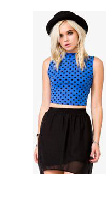

In [18]:
show_image(open_image(IMG_FILE_SRC))

In [19]:
_,_,losses = learn.predict(open_image(IMG_FILE_SRC))

In [20]:
predictions = sorted(zip(classes, map(float, losses)), key=lambda p: p[1], reverse=True)

In [21]:
# Top 5 Predictions
print (predictions[:5])

[('Blouse', 0.3002335727214813), ('Shorts', 0.23011718690395355), ('Top', 0.15922248363494873), ('Tee', 0.1094500944018364), ('Skirt', 0.06342016160488129)]
